In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import train_test_split

# Load the .mat file
mat_data = scipy.io.loadmat('NLS.mat')

# Following is the code to plot the data u vs x and t. u is 256*100
# matrix. Use first 75 columns for training and 25 for testing :)

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['tt']
u = mat_data['uu']

# Use the loaded variables as needed
print(x.shape)
print(t.shape)
print(u.shape)

# X, T = np.meshgrid(x, t)
# # Define custom color levels
# c_levels = np.linspace(np.min(u), np.max(u), 100)

# # Plot the contour
# plt.figure()
# plt.figure(figsize=(15, 5))
# plt.contourf(T, X, u.T, levels=c_levels, cmap='coolwarm')
# plt.xlabel('t')
# plt.ylabel('x')
# plt.title('Schrondinger-Equation')
# plt.colorbar()  # Add a colorbar for the contour levels
# plt.show()

(1, 256)
(1, 201)
(256, 201)


In [2]:
h = np.abs(u)


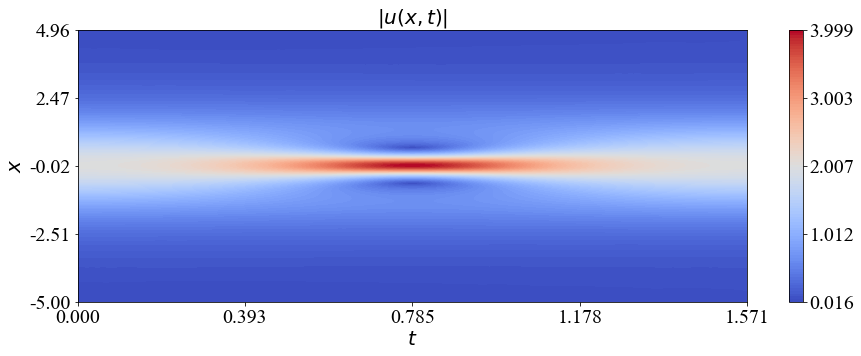

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Assuming you have defined concatenated_tensor as a PyTorch tensor
# concatenated_tensor = torch.cat((tensor1, tensor2), dim=0)

# Convert concatenated_tensor to a NumPy array
concatenated_array = h.T

# Define custom color levels
X, T = np.meshgrid(x, t)

# Define custom color levels using the minimum and maximum from the NumPy array
c_levels = np.linspace(np.min(concatenated_array), np.max(concatenated_array), 100)

# Plot the contour
plt.figure(figsize=(15, 5))
CS1 = plt.contourf(T, X, concatenated_array, levels=c_levels, cmap='coolwarm')

# Create a custom font with Times New Roman
plt.rcParams['figure.figsize'] = [10, 4]

from matplotlib.font_manager import FontProperties
plt.rcParams['axes.unicode_minus'] = False
font_path = 'times-new-roman.ttf'
custom_font = FontProperties(fname=font_path)

cbar1 = plt.colorbar(CS1)
# Set the number of ticks for the color bar with uniformly distributed numbers
num_ticks = 5
c_ticks = np.linspace(np.min(concatenated_array), np.max(concatenated_array), num_ticks)
cbar1.set_ticks(c_ticks)

for t in cbar1.ax.get_yticklabels():
    t.set_fontproperties(custom_font)
    t.set_fontsize(20)

plt.xlabel('$t$', fontsize=20, fontproperties=custom_font)
plt.ylabel('$x$', fontsize=20, fontproperties=custom_font)
plt.title('$|u(x, t)|$', fontsize=20, fontproperties=custom_font)
plt.xticks(fontsize=20, fontproperties=custom_font)
plt.yticks(fontsize=20, fontproperties=custom_font)

# Add a dotted line at t = 0.8
#plt.axvline(x=0.8, color='black', linestyle='dotted')

# Set the number of ticks for x-axis and y-axis to 5
num_ticks = 5
x_ticks = np.linspace(np.min(T), np.max(T), num_ticks)
y_ticks = np.linspace(np.min(X), np.max(X), num_ticks)

plt.gca().xaxis.set_major_locator(FixedLocator(x_ticks))
plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))
cbar1.locator = FixedLocator(c_ticks)

plt.savefig('True_Sch.pdf', dpi=300)
plt.savefig('True_sch.png', dpi=300)
# Show the plot
plt.show()
